<img src="imgs/cat_vector.png">

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#from data_loader import cat_data_loader
from data_loader import load_data
(x_train,y_train),(x_test,y_test)=load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(402, 64, 64, 3)
(402, 1)
(40, 64, 64, 3)
(40, 1)


In [5]:
import matplotlib.pyplot as plt
index=27
plt.imshow(x_train[index])

In [6]:
#x_train_flatten=x_train.reshape(209,64*64*3)
x_train_flatten=x_train.reshape(x_train.shape[0],-1)
x_test_flatten=x_test.reshape(x_test.shape[0],-1)

In [7]:
x_test_flatten.shape

(40, 12288)

In [8]:
x_train_flatten[0]

array([ 0.84492523,  0.83983944,  0.88159802, ...,  0.7259093 ,
        0.75728185,  0.80158332])

In [9]:
x_train=x_train_flatten/255
x_test=x_test_flatten/255

In [13]:
cat_model=Sequential()
cat_model.add(Dense(256,activation='relu',input_shape=(12288,)))
cat_model.add(Dense(128,activation="relu"))
cat_model.add(Dense(64,activation="relu"))
cat_model.add(Dense(32,activation="relu"))
cat_model.add(Dense(1,activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
cat_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3145984   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,189,249
Trainable params: 3,189,249
Non-trainable params: 0
_________________________________________________________________


In [21]:
cat_model.compile(optimizer=SGD(),loss="binary_crossentropy",metrics=['accuracy'])

In [23]:
cat_model.fit(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 402 samples, validate on 40 samples
Epoch 1/40
402/402 [==============================] - 3s 7ms/step - loss: 0.6932 - acc: 0.4826 - val_loss: 0.6934 - val_acc: 0.4250
Epoch 2/40
402/402 [==============================] - 2s 4ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.4250
Epoch 3/40
402/402 [==============================] - 2s 4ms/step - loss: 0.6932 - acc: 0.4776 - val_loss: 0.6933 - val_acc: 0.4250
Epoch 4/40
402/402 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.4635- ETA: 0s - loss: 0.6932 - acc: 0. - 1s 3ms/step - loss: 0.6932 - acc: 0.4677 - val_loss: 0.6933 - val_acc: 0.4250
Epoch 5/40
402/402 [==============================] - 1s 3ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.4750
Epoch 6/40
402/402 [==============================] - 1s 3ms/step - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.4500
Epoch 7/40
402/402 [======================

C:\Users\ZXQ20\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


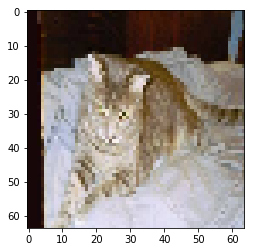

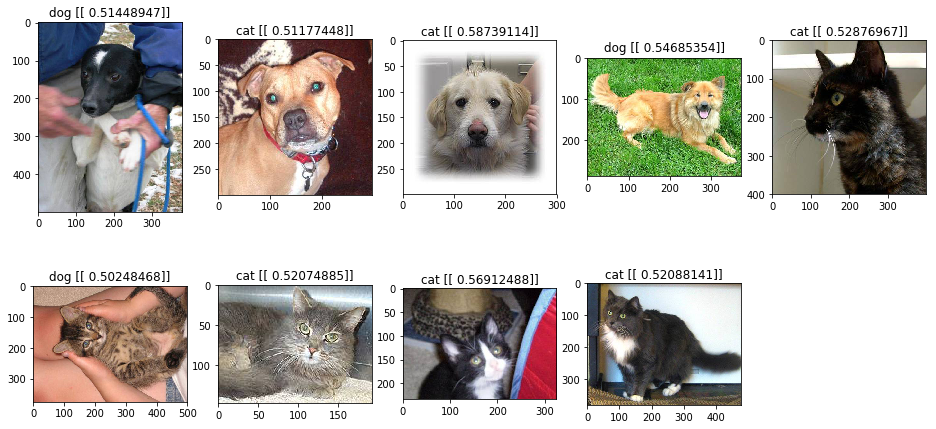

40/40 [==============================] - 0s 4ms/step


[0.69299371242523189, 0.52500000000000002]

In [27]:
from skimage.transform import resize
fig=plt.figure(figsize=(16, 16))
for i in range(1, 10):
    my_image =  'imgs/test/{}.jpg'.format(i)
    my_image = np.array(plt.imread(my_image))
    ax = fig.add_subplot(4, 5, i)
    plt.imshow(my_image)
    num_px = 64
    my_image = resize(my_image, (num_px, num_px))
    my_image.shape
    my_image = my_image.reshape(1, -1)
    a = cat_model.predict(my_image)
    if  a > 0.5:
        ax.title.set_text('cat {}'.format(a))
    else:
        ax.title.set_text('dog {}'.format(1 - a))
    
plt.show()
cat_model.evaluate(x_test, y_test)